# Importando pacotes

In [1]:
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

/home/gpetrini/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Baixando dados: New Residential Construction - Start to Completion

These tables contain annual statistics on the length of time from start of construction to completion of new private residential buildings. Data are obtained from the U.S. Census Bureau's Survey of Construction. Since the Survey of Construction is designed to collect data on a monthly basis, it can only be determined in what month a building was started or completed rather than the precise day. For example, buildings started on August 1 or August 31 would be counted as starting in August. Because of this, it is assumed for this supplement that a building started and completed in the same month took a full month to build. Buildings completed in the first month after start took 1.5 months; those completed in the second month after start took 2.5 months; those completed in the third month after start took 3.0 months; those completed in the fourth month after start took 4.0 months, and so on..

[Fonte](https://www.census.gov/construction/nrc/index.html)

In [2]:
!wget -N https://www.census.gov/construction/nrc/xls/avg_authtostart_cust.xls
!mv avg_authtostart_cust.xls ../data/construcao_autorizacao.xls

--2020-03-22 18:32:43--  https://www.census.gov/construction/nrc/xls/avg_authtostart_cust.xls
Resolvendo www.census.gov (www.census.gov)... 2600:1403:2:596::208c, 2600:1403:2:5a0::208c, 23.10.102.165
Conectando-se a www.census.gov (www.census.gov)|2600:1403:2:596::208c|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 70656 (69K) [application/vnd.ms-excel]
Salvando em: “avg_authtostart_cust.xls”

avg_authtostart_cus 100%[===================>]  69,00K   348KB/s    em 0,2s    

2020-03-22 18:32:45 (348 KB/s) - “avg_authtostart_cust.xls” salvo [70656/70656]



In [3]:
df_autorizacao = pd.read_excel(
    "../data/construcao_autorizacao.xls", 
    skiprows=11, 
    index_col=[0], 
    parse_dates=True
)
df_autorizacao.index.name = 'Ano'
df_autorizacao.columns = [
    'Total',
    'Venda',
    'Contratado',
    'Proprietário',
    'Total (2 ou mais unidade)',
    '2 a 4',
    '5 a 9',
    '10 a 19',
    '20 ou mais'
]
df_autorizacao = df_autorizacao.apply(pd.to_numeric, errors='coerce')
numero_linhas = int((datetime.datetime(2018,1,1) - datetime.datetime(1976,1,1)).days/365.25 +1)
df_autorizacao = df_autorizacao.iloc[:numero_linhas,:]
df_autorizacao.tail()

,Total,Venda,Contratado,Proprietário,Total (2 ou mais unidade),2 a 4,5 a 9,10 a 19,20 ou mais
Ano,,,,,,,,,
2014,0.9,0.9,0.9,1.1,1.4,1.3,0.9,2.0,1.5
2015,0.9,0.8,0.9,1.2,1.8,1.5,2.0,1.9,1.9
2016,0.9,0.8,0.9,1.3,2.0,1.5,1.6,2.1,2.5
2017,0.9,0.9,1.0,1.3,1.8,1.9,1.7,1.6,1.9
2018,1.0,0.9,1.1,1.3,1.8,1.6,2.1,1.5,2.1


In [4]:
!wget -N https://www.census.gov/construction/nrc/xls/avg_starttocomp_cust.xls
!mv avg_starttocomp_cust.xls ../data/construcao_tempo.xls

--2020-03-22 18:32:45--  https://www.census.gov/construction/nrc/xls/avg_starttocomp_cust.xls
Resolvendo www.census.gov (www.census.gov)... 2600:1403:2:59b::208c, 2600:1403:2:596::208c, 23.10.102.165
Conectando-se a www.census.gov (www.census.gov)|2600:1403:2:59b::208c|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 73728 (72K) [application/vnd.ms-excel]
Salvando em: “avg_starttocomp_cust.xls”

avg_starttocomp_cus 100%[===================>]  72,00K  51,9KB/s    em 1,4s    

2020-03-22 18:32:47 (51,9 KB/s) - “avg_starttocomp_cust.xls” salvo [73728/73728]



In [5]:
df_start = pd.read_excel(
    "../data/construcao_tempo.xls", 
    skiprows=11, 
    index_col=[0], 
    parse_dates=True
)
df_start.index.name = 'Ano'
df_start.columns = [
    'Total',
    'Venda',
    'Contratado',
    'Proprietário',
    'Total (2 ou mais unidade)',
    '2 a 4',
    '5 a 9',
    '10 a 19',
    '20 ou mais'
]
df_start = df_start.apply(pd.to_numeric, errors='coerce')
numero_linhas = int((datetime.datetime(2018,1,1) - datetime.datetime(1971,1,1)).days/365.25 + 1)
df_start = df_start.iloc[:numero_linhas,:]
df_start.tail()

,Total,Venda,Contratado,Proprietário,Total (2 ou mais unidade),2 a 4,5 a 9,10 a 19,20 ou mais
Ano,,,,,,,,,
2014,6.2,5.4,7.5,10.8,11.7,10.1,10.6,11.6,13.4
2015,6.3,5.5,7.6,11.1,12.2,10.5,11.2,12.1,14.3
2016,6.6,5.8,7.8,11.5,12.9,10.9,12.4,12.2,15.0
2017,6.5,5.7,8.1,11.2,13.9,11.6,14.0,13.5,15.7
2018,6.7,5.9,8.4,11.4,14.4,10.5,14.6,14.4,17.4


Unindo bases:

In [6]:
df = df_autorizacao + df_start
df = df.dropna()
df.head()

,Total,Venda,Contratado,Proprietário,Total (2 ou mais unidade),2 a 4,5 a 9,10 a 19,20 ou mais
Ano,,,,,,,,,
1999,6.8,6.2,7.0,10.0,11.1,10.0,10.9,12.0,13.2
2000,6.9,6.3,7.1,10.1,11.4,9.8,11.2,12.2,13.3
2001,6.9,6.3,7.6,10.0,11.2,10.1,11.5,11.7,13.1
2002,6.8,6.2,7.2,10.5,11.3,10.5,11.0,11.5,12.8
2003,7.0,6.2,7.5,10.9,11.8,10.8,11.8,12.1,13.8


Selecionando apenas casas de uma unidade

# Distribuição do tempo

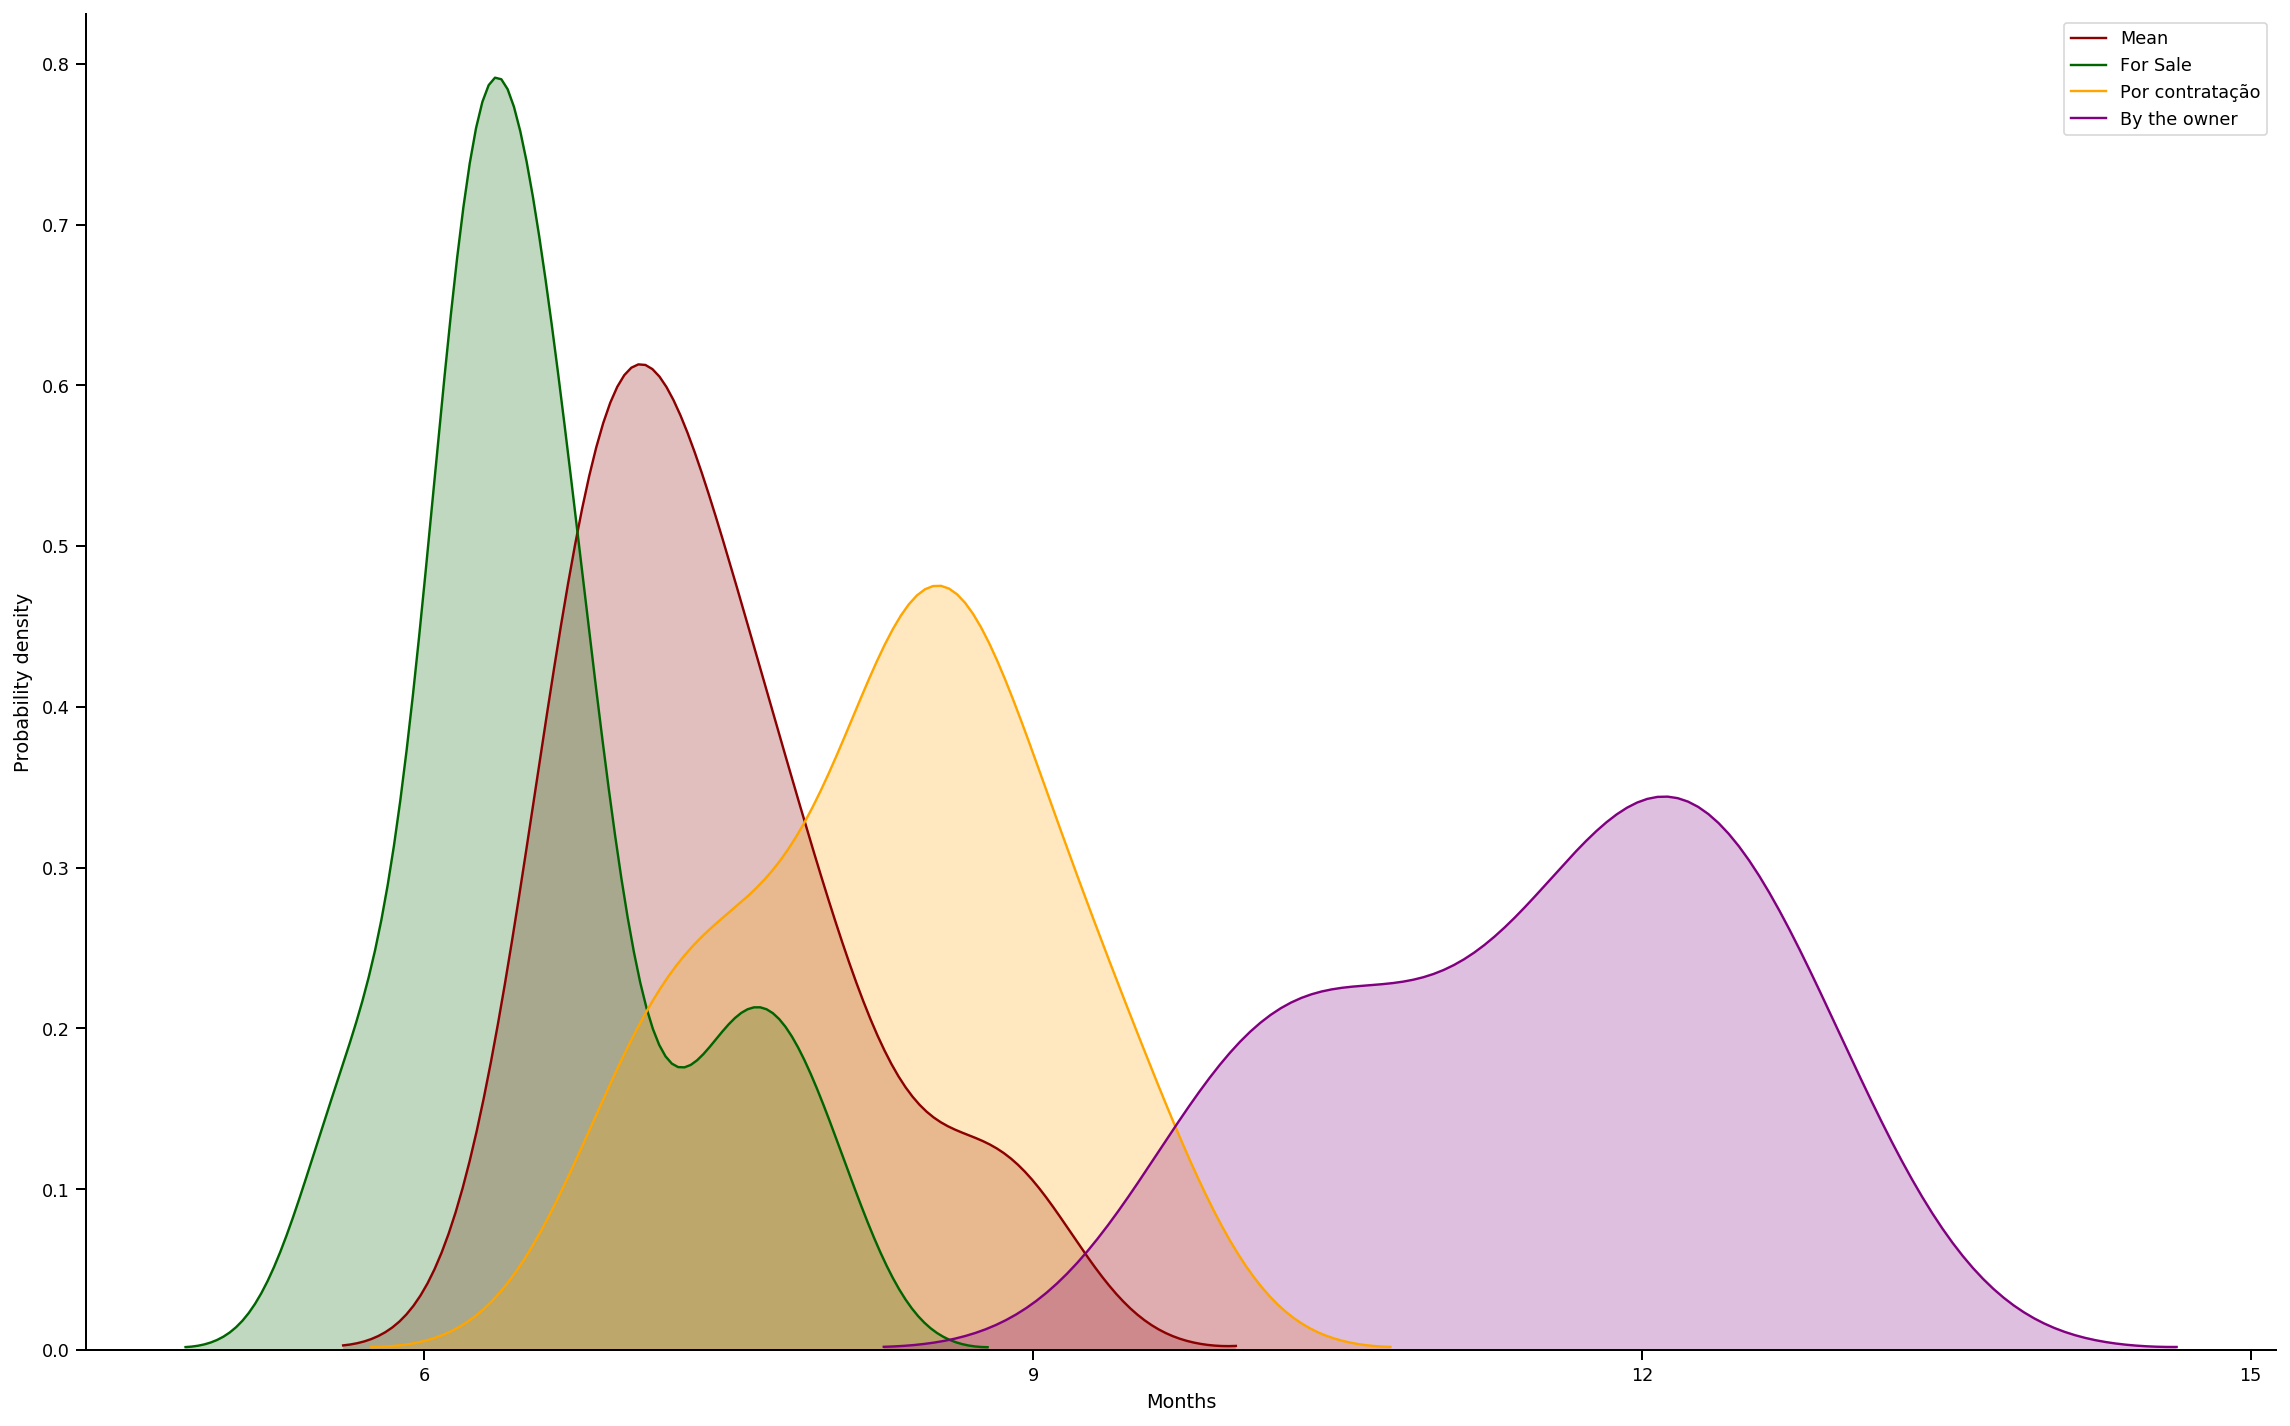

In [7]:
import matplotlib.ticker as plticker

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(16,10))

sns.kdeplot(df["Total"], shade=True, color="darkred", ax = ax, label = 'Mean')
sns.kdeplot(df["Venda"], shade=True, color="darkgreen", ax = ax, label='For Sale')
sns.kdeplot(df["Contratado"], shade=True, color="orange", ax = ax, label='Por contratação')
sns.kdeplot(df["Proprietário"], shade=True, color="purple", ax = ax, label='By the owner')

#ax.xaxis.set_ticks(np.arange(0, 16, 3))
loc = plticker.MultipleLocator(base=3.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)


ax.set_xlabel('Months')
ax.set_ylabel('Probability density')

#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.legend()

sns.despine()
plt.tight_layout()
fig.savefig('../figs/Meses_contrucao.pdf', dpi = 600, bbox_inches = 'tight',
    pad_inches = 0.2, transparent = True,)
plt.show()

# Tipo de financiamento: Casa vendidas

[Type of Financing](https://www.census.gov/construction/chars/definitions/#financing): 

- **Conventional financing** is a mortgage loan not guaranteed by any government agency, such as the Veteran's Administration (VA), the Federal Housing Administration (FHA), or the Rural Housing Service (RHS).
- The **FHA** and **VA** type of financing data presented in these statistics tend to differ from those published directly by those agencies. For the actual number of FHA-insured and VA-guaranteed loans made for new houses at the time of final settlement, refer to the publications of the respective agencies. The data differ because of the difference in time periods between the signing of the original For Sales contract, the start of construction, and the insurance or guarantee of the mortgage, as well as the sampling variability.
- Early in 1995, the Farmers Home Administration was reorganized. As part of this reorganization the RHS now handles the mortgage functions of the former Farmers Home Administration. Collection of RHS data has been discontinued and was last published in our 2007 statistics.

In [8]:
!wget https://www.census.gov/construction/chars/xls/soldfinancing_cust.xls
!mv ./soldfinancing_cust.xls ../data/soldfinancing_cust.xls

--2020-03-22 18:32:50--  https://www.census.gov/construction/chars/xls/soldfinancing_cust.xls
Resolvendo www.census.gov (www.census.gov)... 2600:1403:2:596::208c, 2600:1403:2:59b::208c, 23.10.102.165
Conectando-se a www.census.gov (www.census.gov)|2600:1403:2:596::208c|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 125952 (123K) [application/vnd.ms-excel]
Salvando em: “soldfinancing_cust.xls”

soldfinancing_cust. 100%[===================>] 123,00K   279KB/s    em 0,4s    

2020-03-22 18:32:51 (279 KB/s) - “soldfinancing_cust.xls” salvo [125952/125952]



In [9]:
df = pd.read_excel('../data/soldfinancing_cust.xls', skiprows=7, index_col=[0], parse_dates=True)
nlist = [
    'nTotal',
    'nConvencional',
    'nFHA',
    'nVA',
    'nCash',
]
plist = [
    'pTotal',
    'pConvencional',
    'pFHA',
    'pVA',
    'pCash',
]
df.columns = [i for i in nlist + plist]
df = df.apply(pd.to_numeric, errors='coerce')
df[plist] = df[plist].divide(100)
numero_linhas = int((datetime.datetime(2018,1,1) - datetime.datetime(1978,1,1)).days/365.25 + 1)
df = df.iloc[:numero_linhas,:]
df = df[nlist]
df.columns = [i[1:] for i in nlist]
df = df.apply(lambda x: x/df['Total'])
df = df.drop('Total', axis='columns')
df.index.name = ''
df.head()

,Convencional,FHA,VA,Cash
,,,,
1978,0.735618,0.115055,0.097919,0.052632
1979,0.686883,0.157969,0.104372,0.050776
1980,0.579817,0.249541,0.110092,0.058716
1981,0.591743,0.222477,0.103211,0.082569
1982,0.495146,0.298544,0.121359,0.082524


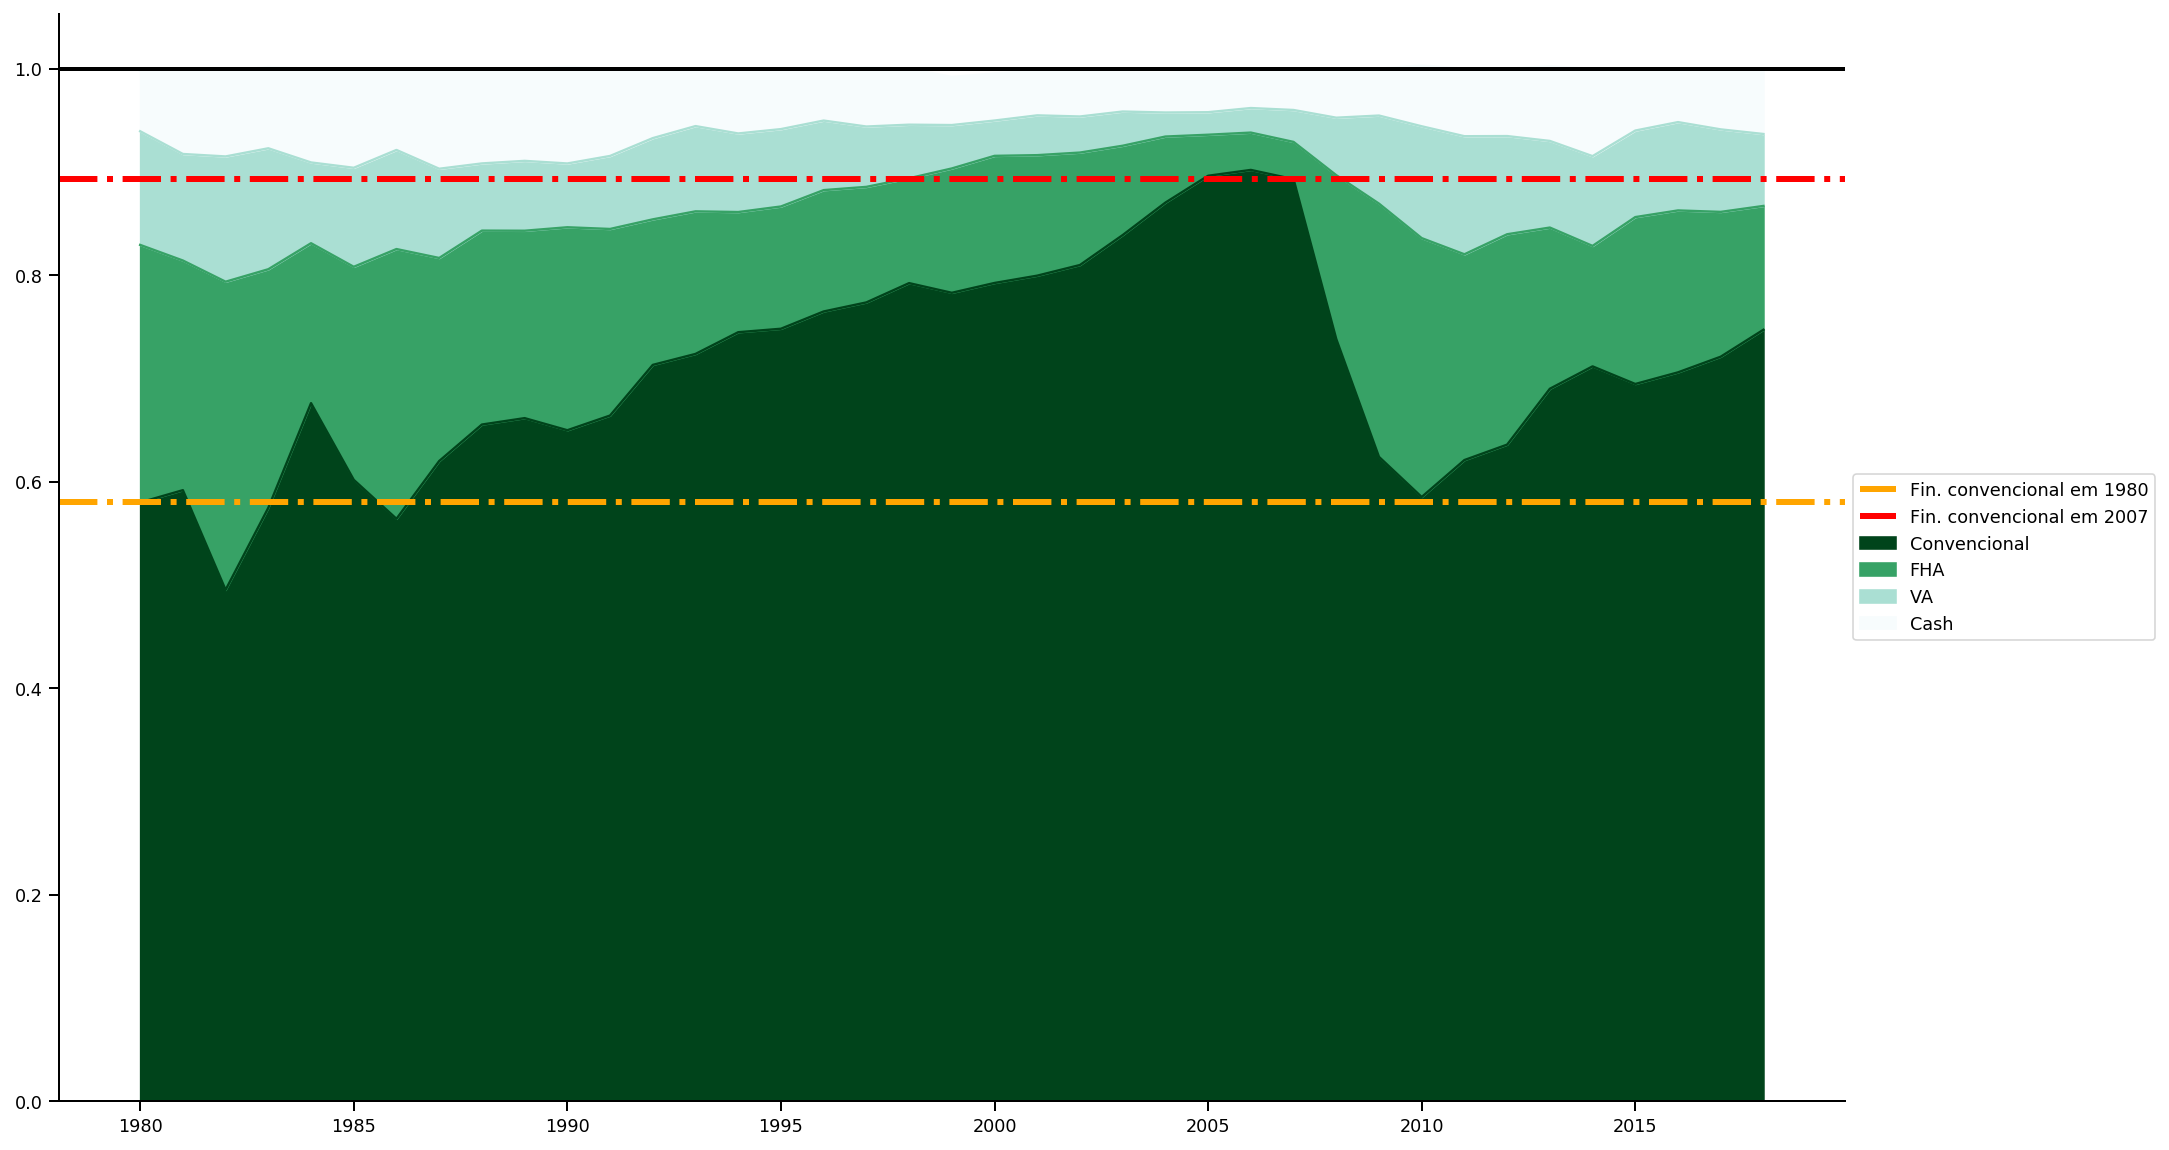

In [10]:
sns.set_style()
fig, ax = plt.subplots(figsize = (16,10))

df['1980':].plot(kind = 'area', stacked = True, ax = ax, cmap = "BuGn_r")
ax.axhline(y=1, lw = 2, color = 'black')
ax.axhline(y = df['Convencional']['1980'], color = 'orange', ls='-.', label = 'Fin. convencional em 1980', lw=3)
ax.axhline(y = df['Convencional']['2007'], color = 'red', ls='-.', label = 'Fin. convencional em 2007', lw=3)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

sns.despine()
plt.show()